In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 📌 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"
test_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8")
test_df = pd.read_csv(test_path, encoding="utf-8")

# 📌 결측값을 -1로 변환할 컬럼 목록 (배아 및 난자 관련 추가 포함)
columns_to_replace = [
    "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인",
    "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부", "대리모 여부",
    "PGD 시술 여부", "PGS 시술 여부",
    "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수",
    "이식된 배아 수", "미세주입 배아 이식 수", "저장된 배아 수",
    "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수",
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일",
    "배아 이식 경과일", "배아 해동 경과일"
]

# 📌 Train/Test 데이터 동일한 결측값 처리
for df in [train_df, test_df]:
    df[columns_to_replace] = df[columns_to_replace].fillna(-1)
    df["임신 시도 또는 마지막 임신 경과 연수"] = df["임신 시도 또는 마지막 임신 경과 연수"].fillna(0).astype(int)
    df["시술 시기 코드"] = df["시술 시기 코드"].astype("category").cat.codes

# 📌 LabelEncoder를 사용한 동일한 인코딩 적용 함수
def apply_label_encoding(train_col, test_col):
    label_encoder = LabelEncoder()
    train_col = train_col.astype(str).fillna("NaN")
    test_col = test_col.astype(str).fillna("NaN")
    
    # Train에서 학습한 인코더를 Test에도 동일 적용
    label_encoder.fit(train_col)
    return label_encoder.transform(train_col), label_encoder.transform(test_col)

# 📌 레이블 인코딩 적용할 컬럼 리스트
label_encode_columns = [
    "시술 당시 나이", "배란 유도 유형", "시술 유형",
    "난자 출처", "정자 출처", "난자 기증자 나이", "정자 기증자 나이",
    "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수",
    "IVF 출산 횟수", "DI 출산 횟수"
]

for col in label_encode_columns:
    train_df[col], test_df[col] = apply_label_encoding(train_df[col], test_df[col])

# 📌 특정 시술 유형 (One-Hot Encoding)
treatment_types = ["ICSI", "IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI"]
for treatment in treatment_types:
    train_df[f"특정 시술 - {treatment}"] = train_df["특정 시술 유형"].apply(lambda x: 1 if treatment in str(x) else 0)
    test_df[f"특정 시술 - {treatment}"] = test_df["특정 시술 유형"].apply(lambda x: 1 if treatment in str(x) else 0)

# 원본 컬럼 삭제
train_df.drop(columns=["특정 시술 유형"], inplace=True)
test_df.drop(columns=["특정 시술 유형"], inplace=True)

# 📌 배아 생성 주요 이유 (One-Hot Encoding)
train_df["배아 생성 주요 이유"] = train_df["배아 생성 주요 이유"].fillna("알 수 없음")
test_df["배아 생성 주요 이유"] = test_df["배아 생성 주요 이유"].fillna("알 수 없음")

embryo_reasons = ["기증용", "난자 저장용", "배아 저장용", "연구용", "현재 시술용"]
for reason in embryo_reasons:
    train_df[f"배아 생성 - {reason}"] = train_df["배아 생성 주요 이유"].apply(lambda x: 1 if reason in str(x) else 0)
    test_df[f"배아 생성 - {reason}"] = test_df["배아 생성 주요 이유"].apply(lambda x: 1 if reason in str(x) else 0)

train_df.drop(columns=["배아 생성 주요 이유"], inplace=True)
test_df.drop(columns=["배아 생성 주요 이유"], inplace=True)

# 📌 숫자형 컬럼 중 빈 값 0으로 변환 (Train/Test 동일)
columns_to_encode = [
    "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
    "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

for df in [train_df, test_df]:
    df[columns_to_encode] = df[columns_to_encode].fillna(0)

# 📌 최종 데이터 저장
train_output_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"
test_output_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test_cleaned.csv"

train_df.to_csv(train_output_path, index=False, encoding="utf-8-sig")
test_df.to_csv(test_output_path, index=False, encoding="utf-8-sig")

print(f"✅ 데이터 전처리 완료!")
print(f"📁 Train 파일 저장 완료: {train_output_path}")
print(f"📁 Test 파일 저장 완료: {test_output_path}")

✅ 데이터 전처리 완료!
📁 Train 파일 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv
📁 Test 파일 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/test_cleaned.csv


In [15]:
import pandas as pd

# 📌 데이터 로드
train_df = pd.read_csv("/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv",encoding="utf-8-sig")

# 📌 object(문자열) 타입 컬럼 찾기
object_columns = train_df.select_dtypes(include=["object"]).columns.tolist()

# 📌 결과 출력
if object_columns:
    print("🔍 문자열이 포함된 컬럼 목록:")
    for col in object_columns:
        print(f"- {col}")
        print(f"  예시 데이터: {train_df[col].dropna().unique()[:5]}")  # 5개 샘플 출력
else:
    print("✅ 문자열 데이터가 없습니다.")

🔍 문자열이 포함된 컬럼 목록:
- ID
  예시 데이터: ['TRAIN_000000' 'TRAIN_000001' 'TRAIN_000002' 'TRAIN_000003'
 'TRAIN_000004']


In [5]:
#랜덤포레스트 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 📌 데이터 로드
train_df = pd.read_csv("/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv").iloc[:, 1:]

# 📌 종속 변수(타겟 변수) 설정
target_variable = "임신 성공 여부"  # 예시로 설정 (실제 변수명 확인 필요)

# 종속 변수가 데이터에 있는지 확인
if target_variable not in train_df.columns:
    raise ValueError(f"'{target_variable}' 컬럼이 존재하지 않습니다. 타겟 변수를 확인해주세요.")

# 📌 독립 변수(X)와 종속 변수(y) 분리
X = train_df.drop(columns=[target_variable])
y = train_df[target_variable]

# 📌 데이터 전처리: 문자열 컬럼이 있으면 원-핫 인코딩
X = pd.get_dummies(X, drop_first=True)  
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)  

# 📌 랜덤 포레스트 모델 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 📌 변수 중요도 추출
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 상위 10개 변수 선택 (혹은 일정 임계값 기준)
selected_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()

# 📌 유의미한 변수 목록 출력
print("✅ 랜덤 포레스트로 선택된 변수 목록:")
print(selected_features)

# 📌 유의미한 변수만 포함한 데이터 출력
filtered_train_df = train_df[selected_features]
print(filtered_train_df.head())  # 상위 5개 행 출력

✅ 랜덤 포레스트로 선택된 변수 목록:
['시술 시기 코드', '수집된 신선 난자 수', '총 생성 배아 수', '배아 이식 경과일', '시술 당시 나이', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '이식된 배아 수', '저장된 배아 수', '클리닉 내 총 시술 횟수', '총 시술 횟수', 'IVF 시술 횟수', '미세주입에서 생성된 배아 수', '미세주입된 난자 수', '불임 원인 - 남성 요인', '불명확 불임 원인', '불임 원인 - 배란 장애', '불임 원인 - 난관 질환', '해동된 배아 수', '불임 원인 - 자궁내막증', '단일 배아 이식 여부', '미세주입 후 저장된 배아 수', '정자 기증자 나이', '미세주입 배아 이식 수']
   시술 시기 코드  수집된 신선 난자 수  총 생성 배아 수  배아 이식 경과일  시술 당시 나이  혼합된 난자 수  \
0         6          7.0        4.0        3.0         0       5.0   
1         5          1.0        0.0       -1.0         5       1.0   
2         3          8.0        5.0        2.0         0       7.0   
3         2          5.0        0.0       -1.0         1       4.0   
4         3          7.0        6.0        3.0         0       6.0   

   파트너 정자와 혼합된 난자 수  이식된 배아 수  저장된 배아 수  클리닉 내 총 시술 횟수  ...  불임 원인 - 남성 요인  \
0               5.0       2.0       2.0              0  ...              1   
1               1.0       0.0       0.0          

In [9]:
import pandas as pd
import numpy as np

# CSV 파일 로드 (전처리된 데이터셋 사용)
file_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"
df = pd.read_csv(file_path, encoding="utf-8")

### 🔹 1️⃣ 전체 결측치 확인 ###
missing_values = df.isnull().sum()  # 각 컬럼별 결측치 개수
missing_percentage = (missing_values / len(df)) * 100  # 전체 데이터 대비 결측치 비율(%)

# 결측치가 있는 컬럼만 필터링
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_percentage})
missing_df = missing_df[missing_df["결측치 개수"] > 0]

print("📌 [전체 결측치 확인]")
if missing_df.empty:
    print("✅ 데이터에 결측치가 없습니다!")
else:
    print(missing_df)

### 🔹 2️⃣ 이상치(Outliers) 탐지 ###
def detect_outliers_iqr(data, col):
    """IQR(사분위 범위) 기반 이상치 탐지 함수"""
    Q1 = data[col].quantile(0.25)  # 1사분위 (25%)
    Q3 = data[col].quantile(0.75)  # 3사분위 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한값
    upper_bound = Q3 + 1.5 * IQR  # 상한값
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

# 수치형 컬럼에서 이상치 개수 계산
numerical_columns = df.select_dtypes(include=[np.number]).columns
outlier_counts = {col: detect_outliers_iqr(df, col) for col in numerical_columns}

# 이상치가 있는 컬럼만 출력
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=["컬럼명", "이상치 개수"])
outlier_df = outlier_df[outlier_df["이상치 개수"] > 0]

print("\n📌 [이상치(Outlier) 탐지 결과]")
if outlier_df.empty:
    print("✅ 이상치가 발견되지 않았습니다!")
else:
    print(outlier_df)


📌 [전체 결측치 확인]
✅ 데이터에 결측치가 없습니다!

📌 [이상치(Outlier) 탐지 결과]
                      컬럼명  이상치 개수
1                시술 당시 나이     329
2   임신 시도 또는 마지막 임신 경과 연수    9358
3                   시술 유형    6291
4                배란 자극 여부   58631
5                배란 유도 유형   61919
..                    ...     ...
76            배아 생성 - 기증용    5081
77         배아 생성 - 난자 저장용    2015
78         배아 생성 - 배아 저장용    9427
79            배아 생성 - 연구용       2
80         배아 생성 - 현재 시술용   18726

[72 rows x 2 columns]


✅ 원본 데이터 클래스 분포:
임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64
✅ 언더샘플링 후 클래스 분포:
임신 성공 여부
0    66228
1    66228
Name: count, dtype: int64
✅ 모델 정확도: 0.6450

✅ 분류 보고서:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     13267
           1       0.63      0.71      0.67     13225

    accuracy                           0.64     26492
   macro avg       0.65      0.65      0.64     26492
weighted avg       0.65      0.64      0.64     26492



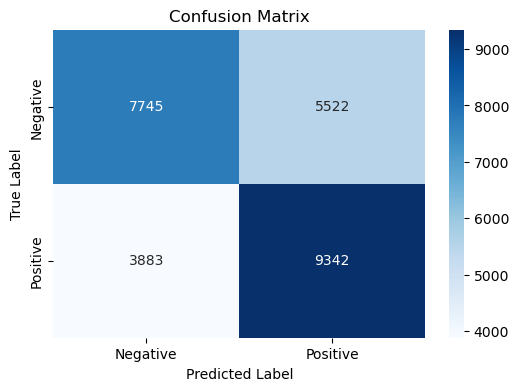

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"

# 📌 데이터 로드 (첫 번째 열 제외)
train_df = pd.read_csv(train_path, encoding="utf-8-sig").iloc[:, 1:]

# 📌 종속 변수(타겟 변수) 설정 (실제 데이터에 맞게 변경 필요)
target_variable = "임신 성공 여부"

# 종속 변수가 데이터에 있는지 확인
if target_variable not in train_df.columns:
    raise ValueError(f"'{target_variable}' 컬럼이 존재하지 않습니다. 타겟 변수를 확인해주세요.")

# 📌 독립 변수(X)와 종속 변수(y) 분리
X = train_df.drop(columns=[target_variable])
y = train_df[target_variable]

# 📌 데이터 전처리: 문자열 컬럼이 있으면 원-핫 인코딩
X = pd.get_dummies(X, drop_first=True)  
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)  

# 📌 클래스별 데이터 개수 확인
class_counts = y.value_counts()
print(f"✅ 원본 데이터 클래스 분포:\n{class_counts}")

# 📌 언더샘플링 (다수 클래스에서 소수 클래스와 동일한 개수로 샘플링)
min_class_count = class_counts.min()  # 소수 클래스 개수
df_balanced = pd.concat([
    train_df[train_df[target_variable] == 0].sample(n=min_class_count, random_state=42),
    train_df[train_df[target_variable] == 1].sample(n=min_class_count, random_state=42)
])

# 📌 언더샘플링 후 데이터 분리
X_balanced = df_balanced.drop(columns=[target_variable])
y_balanced = df_balanced[target_variable]

# 📌 클래스 균형 확인
print(f"✅ 언더샘플링 후 클래스 분포:\n{y_balanced.value_counts()}")

# 📌 랜덤 포레스트 모델 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_balanced, y_balanced)

# 📌 변수 중요도 추출
feature_importance = pd.DataFrame({'Feature': X_balanced.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 📌 선택된 변수만으로 데이터 구성
selected_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()
X_selected = X_balanced[selected_features]

# 📌 Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_balanced, test_size=0.2, random_state=42)

# 📌 새로운 랜덤 포레스트 모델 학습
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train, y_train)

# 📌 예측 및 평가
y_pred = rf_selected.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 📌 컨퓨전 매트릭스 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 📌 결과 출력
print(f"✅ 모델 정확도: {accuracy:.4f}")
print("\n✅ 분류 보고서:")
print(report)

# 📌 컨퓨전 매트릭스 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
print(selected_features)

['시술 시기 코드', '배아 이식 경과일', '수집된 신선 난자 수', '총 생성 배아 수', '시술 당시 나이', '이식된 배아 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '클리닉 내 총 시술 횟수', '저장된 배아 수', '총 시술 횟수', 'IVF 시술 횟수', '미세주입에서 생성된 배아 수', '미세주입된 난자 수', '불임 원인 - 남성 요인', '불명확 불임 원인', '불임 원인 - 배란 장애', '불임 원인 - 난관 질환', '해동된 배아 수', '단일 배아 이식 여부', '불임 원인 - 자궁내막증', '미세주입 후 저장된 배아 수', '정자 기증자 나이', '미세주입 배아 이식 수']


✅ 원본 데이터 클래스 분포:
임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64
✅ SMOTE 적용 후 클래스 분포:
임신 성공 여부
0    190123
1    190123
Name: count, dtype: int64
✅ XGBoost 모델 정확도: 0.7692

✅ 분류 보고서:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     38110
           1       0.78      0.76      0.77     37940

    accuracy                           0.77     76050
   macro avg       0.77      0.77      0.77     76050
weighted avg       0.77      0.77      0.77     76050



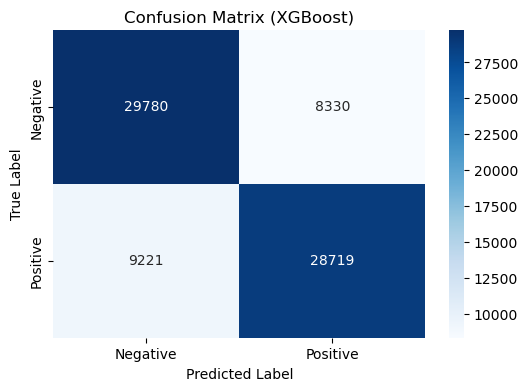

In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# 📌 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"

# 📌 데이터 로드 (첫 번째 열 제외)
train_df = pd.read_csv(train_path, encoding="utf-8-sig").iloc[:, 1:]

# 📌 종속 변수(타겟 변수) 설정 (실제 데이터에 맞게 변경 필요)
target_variable = "임신 성공 여부"

# 종속 변수가 데이터에 있는지 확인
if target_variable not in train_df.columns:
    raise ValueError(f"'{target_variable}' 컬럼이 존재하지 않습니다. 타겟 변수를 확인해주세요.")

# 📌 독립 변수(X)와 종속 변수(y) 분리
X = train_df.drop(columns=[target_variable])
y = train_df[target_variable]

# 📌 데이터 전처리: 문자열 컬럼이 있으면 원-핫 인코딩
X = pd.get_dummies(X, drop_first=True)  
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)  

# 📌 클래스별 데이터 개수 확인
class_counts = y.value_counts()
print(f"✅ 원본 데이터 클래스 분포:\n{class_counts}")

# 📌 SMOTE 오버샘플링 적용 (소수 클래스 증강)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 📌 오버샘플링 후 클래스 분포 확인
print(f"✅ SMOTE 적용 후 클래스 분포:\n{y_resampled.value_counts()}")

# 📌 Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 📌 XGBoost 모델 학습
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

# 📌 예측 및 평가
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 📌 컨퓨전 매트릭스 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 📌 결과 출력
print(f"✅ XGBoost 모델 정확도: {accuracy:.4f}")
print("\n✅ 분류 보고서:")
print(report)

# 📌 컨퓨전 매트릭스 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost)")
plt.show()